In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# loading the ds
df = pd.read_csv('Mental Health Dataset.csv')

# displaying the first rows of the ds
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [12]:
df.info()

# checking for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [13]:
# filling missing values in 'self_employed' with 'Unknown'
df['self_employed'].fillna('Unknown', inplace=True)

# checking if there are no missing values in 'self_employed'
missing_values = df['self_employed'].isnull().sum()
print(missing_values)

0


/var/folders/y3/8625qwkj709c_tjz60jsywfc0000gn/T/ipykernel_8998/1871679930.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna('Unknown', inplace=True)


In [14]:
# converting 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

dtypes_info = df.dtypes

dtypes_info

Timestamp                  datetime64[ns]
Gender                             object
Country                            object
Occupation                         object
self_employed                      object
family_history                     object
treatment                          object
Days_Indoors                       object
Growing_Stress                     object
Changes_Habits                     object
Mental_Health_History              object
Mood_Swings                        object
Coping_Struggles                   object
Work_Interest                      object
Social_Weakness                    object
mental_health_interview            object
care_options                       object
dtype: object

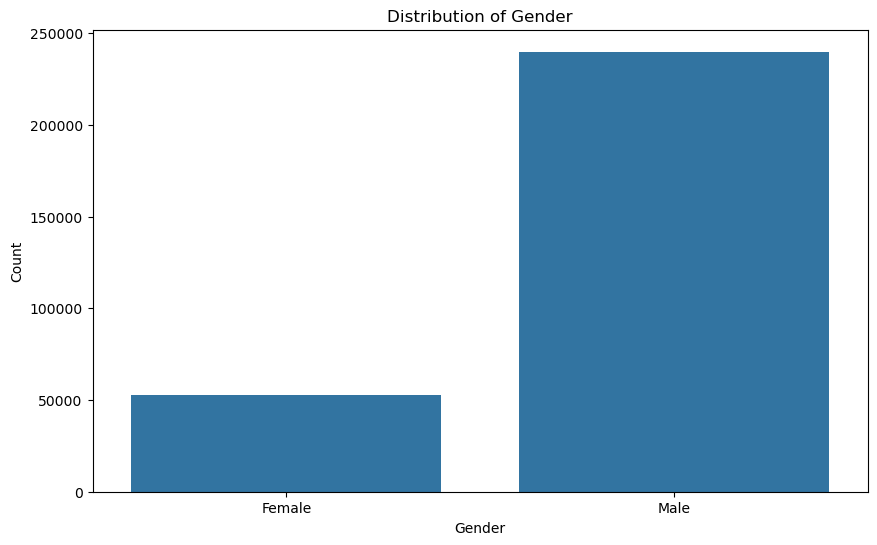

In [29]:
# creating a plot of gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

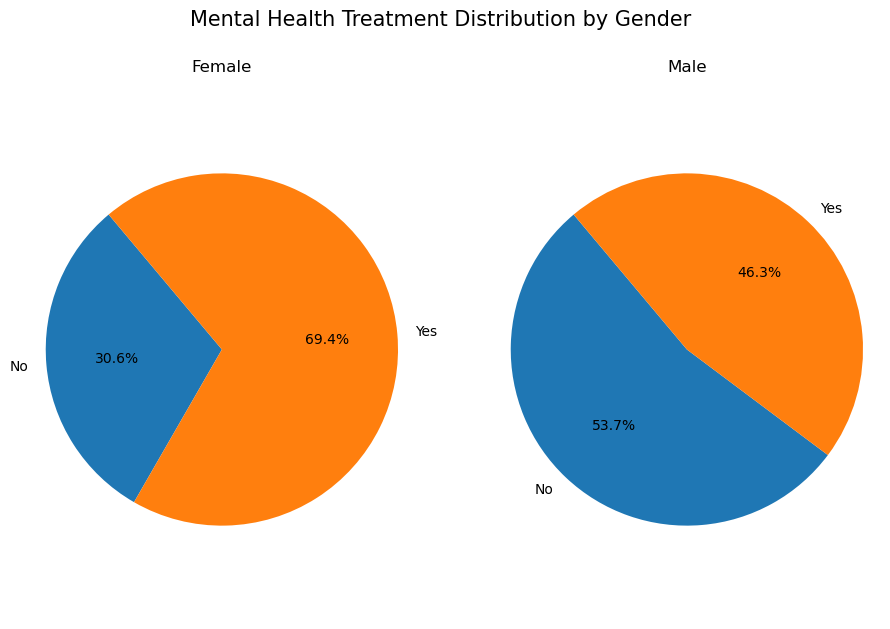

In [32]:
# distribution of mental health treatment by gender
treatment_by_gender = df.groupby('Gender')['treatment'].value_counts(normalize=True).unstack()


fig, axes = plt.subplots(1, 2, figsize=(11, 7))


for i, gender in enumerate(treatment_by_gender.index):
    axes[i].pie(treatment_by_gender.loc[gender], labels=treatment_by_gender.columns, autopct='%1.1f%%', startangle=130)
    axes[i].set_title(f'{gender}')
    axes[i].axis('equal')

plt.suptitle('Mental Health Treatment Distribution by Gender', fontsize=15)
plt.show()